In [1]:
#### Random forest

In [2]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2023-09-22 17:58:54.620382: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-22 17:58:54.621434: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-22 17:58:54.642782: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-22 17:58:54.643571: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-22 17:58:54.971274: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [5]:
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model

In [10]:
df=pd.read_csv('/home/smart/Desktop/reja_awadhesh/EP_ML_reply/EP_ML-main/data_N4.csv')
df

,Unnamed: 0,index,0,1,2,3,4,5,6,X
0,0,10124,0.678,0.739000,0.791,0.003461,0.003616,0.005533,0.005533,0.018143
1,1,4512,0.804,1.146116,4.424,0.002871,0.517205,0.791381,0.004590,1.316048
2,2,18342,2.951,4.522000,3.085,0.006552,0.006847,0.032764,0.032764,0.078927
3,3,1618,0.449,1.240574,0.838,0.067286,0.555547,0.850048,0.107582,1.580464
4,4,11385,0.033,4.663000,4.127,0.000001,0.000666,0.001018,0.000002,0.001687
...,...,...,...,...,...,...,...,...,...,...
49998,49998,4426,3.409,3.333000,4.024,0.050737,0.058553,0.089592,0.081122,0.280004
49999,49999,1994,4.335,1.002000,2.212,0.001892,0.001977,0.003024,0.003024,0.009917
50000,50000,1260,3.830,3.064000,3.484,0.032075,0.032073,0.032076,0.032073,0.128298
50001,50001,15505,3.608,2.942000,1.942,0.020316,0.022314,0.034143,0.032483,0.109256


In [11]:
train, test = train_test_split( df, test_size=0.1, random_state=4)

X_train = train[['0','1','2']].values
Y_train = train[['X']].values

X_test = test[['0','1','2']].values
Y_test = test[['X']].values

In [129]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 300,min_samples_split=20,random_state = 0,n_jobs=3)

# Fitting the Random Forest Regression model to the data
model.fit(X_train, Y_train)

/home/smart/.local/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(min_samples_split=20, n_estimators=300, n_jobs=3,
                      random_state=0)

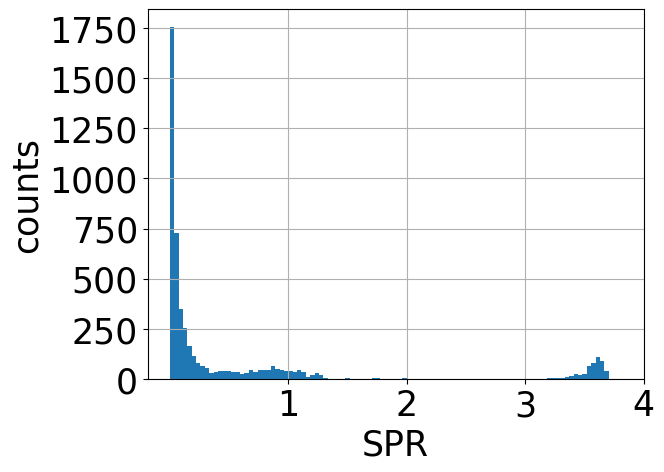

In [150]:
N, bins, patches = plt.hist(Y_pred,bins=100)
plt.xlabel(r'SPR',fontsize=25)
plt.ylabel("counts",fontsize=25)
plt.xticks([1,2,3,4],fontsize=25)
plt.yticks(fontsize=25)
plt.grid()
plt.savefig('/home/smart/Desktop/reja_awadhesh/EP_ML_reply/RF_pred_4site.png', bbox_inches='tight',dpi=600)

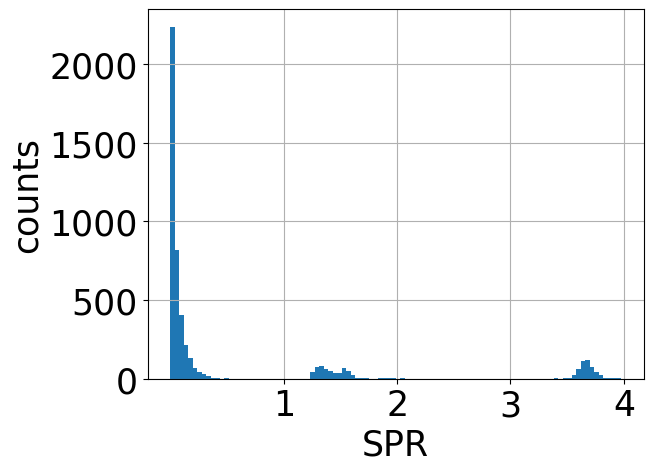

In [131]:
N, bins, patches = plt.hist(Y_test,bins=100)
plt.xlabel(r'SPR',fontsize=25)
plt.ylabel("counts",fontsize=25)
plt.xticks([1,2,3,4],fontsize=25)
plt.yticks(fontsize=25)
plt.grid()

In [132]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming rf_model is your trained Random Forest model
Y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(Y_train, Y_train_pred)
r2_train = r2_score(Y_train, Y_train_pred)

print("Training MSE:", mse_train)
print("Training R-squared:", r2_train)
print("Training RMSE:", np.sqrt(mse_train))

Training MSE: 0.031006111459858238
Training R-squared: 0.9753755133016296
Training RMSE: 0.1760855231410528


In [133]:
# Assuming X_test and y_test represent your testidation dataset
Y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(Y_test, Y_test_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print("testidation MSE:", mse_test)
print("testidation R-squared:", r2_test)
print("Test RMSE:", np.sqrt(mse_test))

testidation MSE: 0.0613794656515316
testidation R-squared: 0.9496443746966954
Test RMSE: 0.247748795459295


In [134]:
from sklearn.tree import export_text

tree = model.estimators_[1]

# Print the decision tree rules
tree_rules = export_text(tree)  # Replace X with your feature data
print("Decision Tree Rules:")
print(tree_rules)


Decision Tree Rules:
|--- feature_0 <= 3.01
|   |--- feature_1 <= 2.81
|   |   |--- feature_1 <= 1.00
|   |   |   |--- feature_0 <= 0.00
|   |   |   |   |--- value: [0.75]
|   |   |   |--- feature_0 >  0.00
|   |   |   |   |--- feature_2 <= 2.45
|   |   |   |   |   |--- feature_0 <= 0.97
|   |   |   |   |   |   |--- feature_2 <= 1.80
|   |   |   |   |   |   |   |--- feature_1 <= 0.76
|   |   |   |   |   |   |   |   |--- feature_0 <= 0.52
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.17
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.01]
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_0 >  0.17
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.33
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.10]
|   |   |   |   |   |   |   |   |   |   |--- fea

In [135]:
new_data = np.column_stack((X_test, Y_pred))
pred=pd.DataFrame(new_data)
B_pred=pred

In [136]:
new_data = np.column_stack((X_test, Y_test))
A_test=pd.DataFrame(new_data)
A_test

,0,1,2,3
0,1.672000,3.547000,1.928,0.035745
1,3.468000,0.180000,0.879,0.000672
2,0.558000,1.782322,0.398,1.485174
3,3.576000,0.727000,2.213,0.006751
4,1.468981,1.834779,2.585,3.695163
...,...,...,...,...
4996,3.901000,1.183000,0.396,0.088509
4997,3.084000,2.618000,2.381,0.172532
4998,0.655000,2.481000,4.344,0.013057
4999,4.562000,2.643000,4.041,0.054263


In [137]:
def SPR(value):
    if value < 1:
        return 0
    if 1 <= value < 2:
        return 2
    elif 2 <= value < 3:
        return 3
    elif 3 <= value < 4:
        return 4

In [138]:
A_test['SPR'] = A_test[3].map(SPR)
A_test

,0,1,2,3,SPR
0,1.672000,3.547000,1.928,0.035745,0
1,3.468000,0.180000,0.879,0.000672,0
2,0.558000,1.782322,0.398,1.485174,2
3,3.576000,0.727000,2.213,0.006751,0
4,1.468981,1.834779,2.585,3.695163,4
...,...,...,...,...,...
4996,3.901000,1.183000,0.396,0.088509,0
4997,3.084000,2.618000,2.381,0.172532,0
4998,0.655000,2.481000,4.344,0.013057,0
4999,4.562000,2.643000,4.041,0.054263,0


In [139]:
B_pred['SPR'] = B_pred[3].map(SPR)
B_pred

,0,1,2,3,SPR
0,1.672000,3.547000,1.928,0.059324,0
1,3.468000,0.180000,0.879,0.000727,0
2,0.558000,1.782322,0.398,0.511340,0
3,3.576000,0.727000,2.213,0.007232,0
4,1.468981,1.834779,2.585,3.450146,4
...,...,...,...,...,...
4996,3.901000,1.183000,0.396,0.132920,0
4997,3.084000,2.618000,2.381,0.122504,0
4998,0.655000,2.481000,4.344,0.019143,0
4999,4.562000,2.643000,4.041,0.053535,0


In [140]:
count_A_test = (A_test.iloc[:,4] == 4).sum()
count_A_test

479

In [141]:
count_B_pred = (B_pred.iloc[:,4] == 4).sum()
count_B_pred

483

In [142]:
C3 = A_test.drop(A_test.columns[3], axis=1)
C3

,0,1,2,SPR
0,1.672000,3.547000,1.928,0
1,3.468000,0.180000,0.879,0
2,0.558000,1.782322,0.398,2
3,3.576000,0.727000,2.213,0
4,1.468981,1.834779,2.585,4
...,...,...,...,...
4996,3.901000,1.183000,0.396,0
4997,3.084000,2.618000,2.381,0
4998,0.655000,2.481000,4.344,0
4999,4.562000,2.643000,4.041,0


In [143]:
C4 = B_pred.drop(B_pred.columns[3], axis=1)
C4

,0,1,2,SPR
0,1.672000,3.547000,1.928,0
1,3.468000,0.180000,0.879,0
2,0.558000,1.782322,0.398,0
3,3.576000,0.727000,2.213,0
4,1.468981,1.834779,2.585,4
...,...,...,...,...
4996,3.901000,1.183000,0.396,0
4997,3.084000,2.618000,2.381,0
4998,0.655000,2.481000,4.344,0
4999,4.562000,2.643000,4.041,0


In [144]:
C5=C3.compare(C4)
C5

SPR      
     self other
2     2.0   0.0
14    2.0   0.0
22    2.0   0.0
29    2.0   0.0
52    2.0   0.0
...   ...   ...
4910  2.0   0.0
4929  0.0   2.0
4945  2.0   0.0
4955  2.0   0.0
4972  2.0   0.0

[378 rows x 2 columns]

In [145]:
C5[C5.iloc[:,0]==0].shape

(36, 2)

In [146]:
C5[C5.iloc[:,0]==2].shape

(338, 2)

In [147]:
C5[C5.iloc[:,0]==4].shape

(2, 2)

In [148]:
36+338+2

376

In [149]:
(5000-376)/5000

0.9248